In [143]:
import pandas as pd


In [144]:
dataset = pd.read_csv('/content/winequality-red.csv')

In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [146]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [147]:
dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [148]:
import seaborn as sns

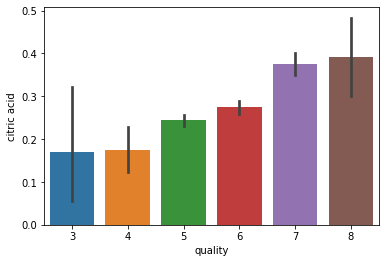

In [149]:
sns.barplot(x='quality',y='citric acid',data=dataset)

In [150]:
x = dataset.drop('quality',axis=1)
y = dataset['quality']

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
from sklearn import preprocessing

In [153]:
train_data,test_data,train_label,test_label = train_test_split(x,y,test_size=0.2)

In [154]:
from tensorflow.keras import models
from tensorflow.keras.layers import *

In [155]:
model = models.Sequential()

In [156]:
model.add(Dense(128, activation='relu', input_shape = (train_data.shape[-1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [157]:
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['mae'])

In [158]:
model.fit(train_data,train_label, epochs=10)

Epoch 1/10
40/40 [==============================] - 1s 2ms/step - loss: 2.7706 - mae: 1.2066
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 1.0567 - mae: 0.7906
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 0.9768 - mae: 0.7581
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 0.9061 - mae: 0.7312
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 0.8528 - mae: 0.7309
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.7745 - mae: 0.6929
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.8439 - mae: 0.7304
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 0.6887 - mae: 0.6517
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.7286 - mae: 0.6786
Epoch 10/10
40/40 [==============================] - 0s 2ms/step - loss: 0.6928 - mae: 0.6573


In [159]:
model.evaluate(test_data,test_label)

10/10 [==============================] - 0s 1ms/step - loss: 0.9959 - mae: 0.8152


[0.9958750605583191, 0.815237820148468]

In [160]:
model.save('Wine_Quality_Prediction.h5')